# ANN - car prices

https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [1]:
# prompt: import KerasRegressor from version 2.15

#!pip install keras==2.14.0
#!pip install tensorflow==2.14.0
from scikeras.wrappers import KerasRegressor


In [2]:
# prompt: print keras version

import keras
print(keras.__version__)


2.14.0


In [3]:
from scikeras.wrappers import KerasRegressor

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
!conda install anaconda::pandas
!conda install anaconda::numpy

In [4]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle('CarPricesData.pkl')
CarPricesDataNumeric.head()

ModuleNotFoundError: No module named 'pandas'

In [8]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
51/51 [==============================] - 1s 2ms/step - loss: 0.9834
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.9425
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.7520
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.4939
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.3232
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.2146
Epoch 8/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1917
Epoch 9/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1756
Epoch 10/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1649
Epoch 11/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1588
Epoch 12/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1541
Epoch 13/50
51/51 [==============================

In [10]:

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

14/14 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 61.256038321121984


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 50.58661393659322


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 62.91211075416409


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 61.34704496322931


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 43.70292021009202


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 47.728950925601346


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 53.31603546840791


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 7ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 66.57103515847666


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 29.520777213231185


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 48.545558748689004


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 42.407269348846285


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 58.28471118072376


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 53.305009104606455


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 3ms/step
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 45.89788788020223


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 51.97759930163549


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14/14 [==============================] - 0s 2ms/step
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 59.30400169649313


<ipython-input-10-86b9090512e5>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<Axes: xlabel='Parameters'>

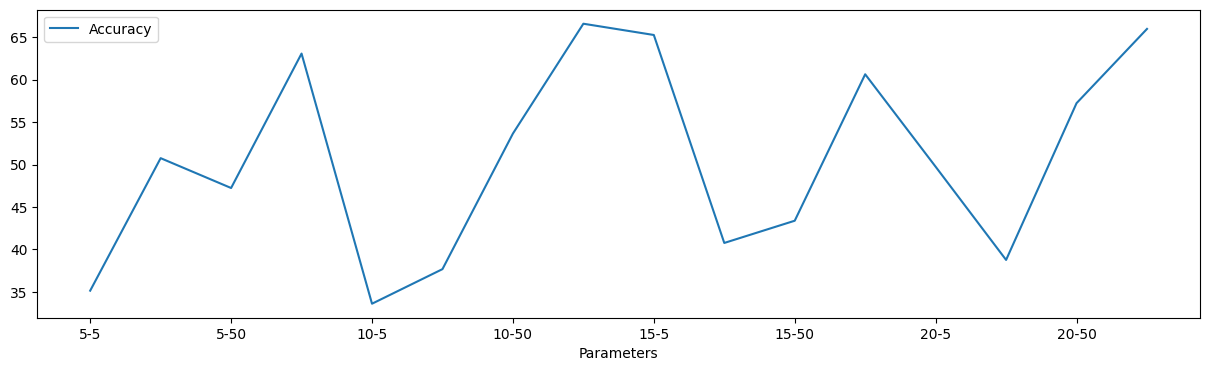

In [13]:

%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

Training the ANN model with the best parameters

In [14]:

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 [==============================] - 0s 7ms/step


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9783.259766
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9899.865234
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8940.580078
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9180.291016
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8909.033203


## Finding the accuracy of the model

Using the final trained model, now we are generating the prediction error for each row in testing data as the Absolute Percentage Error. Taking the average for all the rows is known as Mean Absolute Percentage Error(MAPE).

The accuracy is calculated as 100-MAPE.

In [15]:

# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 91.01364473436425


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9783.259766,1.675781
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9899.865234,23.825706
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8940.580078,19.207734
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9180.291016,7.735769
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8909.033203,0.457730


In [17]:
!pip install scikeras

In [13]:

# Function to generate Deep ANN model
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasRegressor
#from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
#RegModel=KerasRegressor(make_regression_ann, verbose=0)
RegModel=KerasRegressor(make_regression_ann, Optimizer_trial='adam', verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel,
                         param_grid=Parameter_Trials,
                         scoring=custom_Scoring,
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10
115/115 [==============================] - 1s 2ms/step - loss: 0.3299
Epoch 2/10
115/115 [==============================] - 0s 2ms/step - loss: 0.1691
Epoch 3/10
115/115 [==============================] - 0s 2ms/step - loss: 0.1121
Epoch 4/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0940
Epoch 5/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0876
Epoch 6/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0839
Epoch 7/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0835
Epoch 8/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 9/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0813
Epoch 10/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0805
###################################################################### Accuracy: 35.487858054685276
Epoch 1/10
115/115 [==============================] - 1s 2ms/step - loss: 1.1343
Epoch 2/

{'Optimizer_trial': 'adam', 'batch_size': 30, 'epochs': 10}

In [16]:
!pip freeze > requirements.txt

In [17]:
!conda env export > environment.yml

/bin/bash: line 1: conda: command not found
